# Question 6

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,roc_auc_score,accuracy_score
from sklearn import preprocessing
from sklearn import ensemble, neighbors, svm, tree, neural_network
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

# Data Upload and Query

In [4]:
#Data Splitting and Missing Values

In [5]:
df = pd.read_csv('dataset.csv')
df_fill = df.fillna(df.median())
df_fill.columns

Index(['ccode', 'iso', 'year', 'govvote', 'oppvote', 'frac', 'partycount',
       'right', 'left', 'extr', 'protests', 'protestsdev', 'demosdev',
       'riotsdev', 'strikesdev', 'rgdp', 'gdppeak', 'crisisJST', 'pk_fin',
       'pk_norm', 'pk_dis', 'cpi', 'govcris', 'turnover', 'vetopl', 'dict',
       'election', 'election_year'],
      dtype='object')

# Features and Target Values

In [6]:
X = df_fill[[ 'govvote', 'oppvote', 'frac', 'partycount',
       'right', 'left', 'extr','govcris', 'turnover', 'vetopl', 'dict']]
y = df_fill.crisisJST

# Training Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [8]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import Perceptron

In [9]:
ML = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    #GLM
    linear_model.LogisticRegressionCV(),
    #Navies Bayes
    naive_bayes.GaussianNB(),
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.SVC(probability=True),
    #Trees    
    tree.DecisionTreeClassifier(),
    #Neural_network
    neural_network.MLPClassifier(),
    ]

,Algo Name,Train Accuracy,Test Accuracy,Precission,Recall,AUC
1,LogisticRegressionCV,0.9709,0.9483,0.000000,0.000000,0.478707
3,KNeighborsClassifier,0.9709,0.9483,0.000000,0.000000,0.494141
4,SVC,0.9719,0.9483,0.000000,0.000000,0.453657
6,MLPClassifier,0.9709,0.9483,0.000000,0.000000,0.517441
0,RandomForestClassifier,0.9833,0.9333,0.000000,0.000000,0.495636
5,DecisionTreeClassifier,0.9867,0.9241,0.043478,0.022222,0.465455
2,GaussianNB,0.9493,0.9218,0.074074,0.044444,0.586882


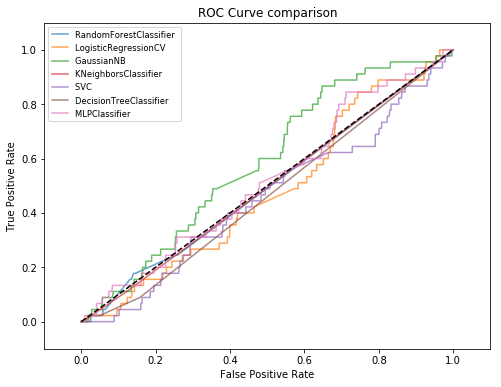

In [10]:
Columns = []
Compare = pd.DataFrame(columns = Columns)

plt.figure(figsize=(8,6))
row_index = 0
for alg in ML:
    pred = alg.fit(x_train, y_train)
    predicted= pred.predict(x_test)
    fp, tp, th = roc_curve(y_test, pred.predict_proba(x_test)[:,1])
    ML_name = alg.__class__.__name__
    Compare.loc[row_index,'Algo Name'] = ML_name
    Compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    Compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    Compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    Compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    Compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    plt.plot(fp,tp,alpha=0.7, label='%s ' % (ML_name))
    row_index+=1
  
plt.title('ROC Curve comparison')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')


Compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
Compare

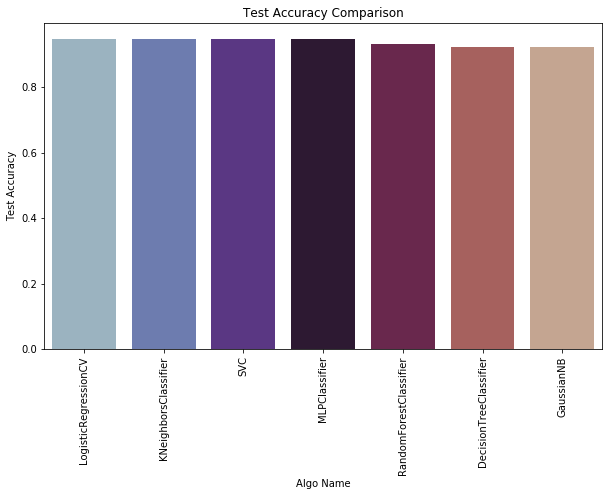

In [12]:
plt.subplots(figsize=(10,6))
sns.barplot(x="Algo Name", y="Test Accuracy",data=Compare,palette='twilight')
plt.xticks(rotation=90)
plt.title('Test Accuracy Comparison')
plt.show()

In [13]:
#Logistic Regression Before Parameter
T_test = []
T_test.clear()
tunealg = linear_model.LogisticRegressionCV() 
tunealg.fit(x_train, y_train)
print('Logistic Regression Before Parameter')
print('Parameters: ', tunealg.get_params())
print("Training score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tunealg.score(x_test, y_test)))


Parameters:  {'Cs': 10, 'class_weight': None, 'cv': 'warn', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Training score: 0.97
Test score: 0.95


In [14]:
#Logistic Regression After Parameter Tuning

param_grid = { 
              'solver': ['newton-cg', 'lbfgs','liblinear', 'sag'],
              'random_state' : [80],
              'penalty':['l2']
             }

tune_model = model_selection.GridSearchCV(linear_model.LogisticRegressionCV(), 
                param_grid=param_grid, cv=12,scoring = 'accuracy')
tune_model.fit (x_train, y_train)
print('\nLogistic Regression After Parameter Tuning')
print('Parameters: ', tune_model.best_params_)
print("Training set score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tune_model.score(x_test, y_test)))

T_test.append(tune_model.score(x_test, y_test))

Parameters:  {'penalty': 'l2', 'random_state': 80, 'solver': 'newton-cg'}
Training set score: 0.97
Test score: 0.95


In [15]:
#Decision Tree Before Parameter Tuning
tunealg = tree.DecisionTreeClassifier() 
tunealg.fit(x_train, y_train)
print('\nDecision Tree Before Parameter Tuning')
print('Parameters: ', tunealg.get_params())
print("Training score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tunealg.score(x_test, y_test)))


Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
Training score: 0.99
Test score: 0.93


In [16]:
#Decision Tree After Parameter Tuning
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), 
                    param_grid=param_grid, cv=10, scoring = 'accuracy')
tune_model.fit (x_train, y_train)

print('\nDecision Tree After Parameter Tuning')
print('Best Parameters: ', tune_model.best_params_)
print("Training score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tune_model.score(x_test, y_test)))

T_test.append(tune_model.score(x_test, y_test))

AFTER tuning Parameters:  {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
AFTER tuning Training set score: 0.97
AFTER tuning Test set score: 0.95


In [17]:
#Neural Network 
t_alg = neural_network.MLPClassifier()
t_alg.fit(x_train, y_train)
print('\nNeural Network ')
print('Parameters: ', t_alg.get_params())
print("Training score: {:.2f}". format(t_alg.score(x_train, y_train))) 
print("Test score: {:.2f}". format(t_alg.score(x_test, y_test)))


Parameters:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Training score: 0.97
Test score: 0.95


In [18]:
#Neural Network After Parameter Tuneing
param_grid = { 'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes':[5,4,3,2], 
              'random_state':[1,2,3]
             }

tmodel = model_selection.GridSearchCV(neural_network.MLPClassifier(), 
                    param_grid=param_grid, cv=10, scoring = 'accuracy')
tmodel.fit (x_train, y_train)

print('\nNeural Network After Parameter Tuneing')
print('Best Parameters: ', tmodel.best_params_)
print("Training score: {:.2f}". format(tmodel.score(x_train, y_train))) 
print("Test score: {:.2f}". format(tmodel.score(x_test, y_test)))

T_test.append(tmodel.score(x_test, y_test))

Best Parameters:  {'activation': 'identity', 'hidden_layer_sizes': 5, 'random_state': 1, 'solver': 'lbfgs'}
Training score: 0.97
Test score: 0.95


<BarContainer object of 3 artists>

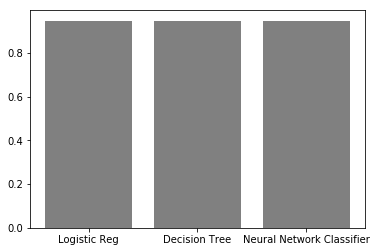

In [23]:
x=['Logistic Reg','Decision Tree', 'Neural Network Classifier']
y = T_test
plt.bar(x,y,label='Algos', color='grey')

In [24]:
#Neural Network for Prediction
nn = MLPClassifier(activation='logistic',solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(x_train,y_train)       


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [1]:
pred = nn.predict(x_test)
sco = nn.score(x_test,y_test)
print(sco)
print(y_test)

NameError: name 'nn' is not defined